# Image Captioning with Attention

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Imports

In [2]:
import tensorflow as tf
tf.enable_eager_execution()

# from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle

# import re
import numpy as np
# import os
# import time
# import json
# from glob import glob
from PIL import Image
# import pickle
from DataDownloader.mscocodownloader import MSCocoDownloader
from Models.inceptionmodel import InceptionModel
from Utils.visualiser import Visualiser
from DatasetGeneration.datasetgeneratornolabels import DatasetGeneratorNoLabels
from DatasetGeneration.datasetgenerator import DatasetGenerator
from Models.attentionmodel import AttentionModel
from Models.Helpers.tokenisations import Tokenisations

## 1. Preparing the Data Download

In [3]:
# Sample Count - number of images used to train and validatate the model, set to be None to include the whole dataset
sample_count = 10000

In [4]:
mscoco = MSCocoDownloader(sample_count)

In [5]:
mscoco.image_name_vector[0:5]

['D:\\Repos\\ImageCaptioningWithAttention/train2014/COCO_train2014_000000324909.jpg',
 'D:\\Repos\\ImageCaptioningWithAttention/train2014/COCO_train2014_000000511972.jpg',
 'D:\\Repos\\ImageCaptioningWithAttention/train2014/COCO_train2014_000000508809.jpg',
 'D:\\Repos\\ImageCaptioningWithAttention/train2014/COCO_train2014_000000270497.jpg',
 'D:\\Repos\\ImageCaptioningWithAttention/train2014/COCO_train2014_000000008014.jpg']

In [6]:
mscoco.train_captions[0:5]

['<start> A skateboarder performing a trick on a skateboard ramp. <end>',
 '<start> a person soaring through the air on skis <end>',
 '<start> a wood door with some boards laid against it <end>',
 '<start> A Do Not Enter sign is posted along a road leading to a stadium. <end>',
 '<start> Small child in a high chair eating off of a green plate.  <end>']

## 2. Visualising the Data (Optional)

In [7]:
vis = Visualiser()

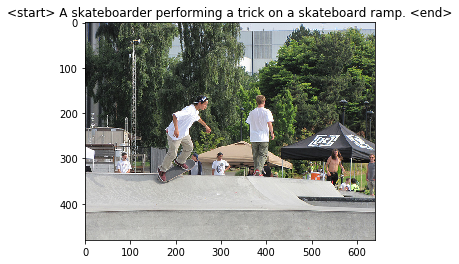

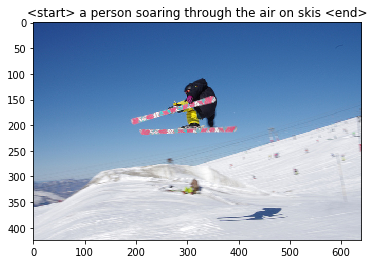

In [8]:
vis.show_image(mscoco.image_name_vector[0],mscoco.train_captions[0])
vis.show_image(mscoco.image_name_vector[1],mscoco.train_captions[1])

## 3. Faster Training by Processing Images through Inception V3

In [9]:
encode_train = sorted(set(mscoco.image_name_vector))
inmodel = InceptionModel()
datasetGeneratorNoLabels = DatasetGeneratorNoLabels(encode_train)

In [10]:
inmodel.cache_to_numpy_files_forward_pass(datasetGeneratorNoLabels.dataset)

598it [15:37,  1.53s/it]


## 4. Preprocess and tokenize the captions

In [11]:
tokenisations = Tokenisations()

In [12]:
tokenisations.prepare_training_tokens(mscoco.train_captions)
tokenisations.save_tokeniser()

## 5. Split Training and Testing

In [13]:
img_name_train, img_name_val, cap_train, cap_val = train_test_split(mscoco.image_name_vector, 
                                                                    tokenisations.cap_vector, 
                                                                    test_size=0.2, 
                                                                    random_state=0)

In [14]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(8000, 8000, 2000, 2000)

## 6. Dataset Generator from Inception Output 

In [24]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = len(tokenisations.tokenizer.word_index)

attention_features_shape = 64

## 7. Model Creation

In [25]:
attentionModel = AttentionModel(tokenisations, embedding_dim, units, vocab_size, BATCH_SIZE, attention_features_shape, inmodel.image_features_extract_model)

In [26]:
datasetGenerator3 = DatasetGenerator(img_name_train, cap_train, BATCH_SIZE, BUFFER_SIZE)

## 8. Training

In [27]:
attentionModel.train(datasetGenerator3.dataset, 20)

Epoch 1 Batch 0 Loss nan
Epoch 1 Batch 100 Loss nan
Epoch 1 Loss nan
Time taken for 1 epoch 734.4483115673065 sec

Epoch 2 Batch 0 Loss nan
Epoch 2 Batch 100 Loss nan
Epoch 2 Loss nan
Time taken for 1 epoch 776.8503348827362 sec

Epoch 3 Batch 0 Loss nan
Epoch 3 Batch 100 Loss nan
Epoch 3 Loss nan
Time taken for 1 epoch 798.4805142879486 sec

Epoch 4 Batch 0 Loss nan
Epoch 4 Batch 100 Loss nan
Epoch 4 Loss nan
Time taken for 1 epoch 962.8706159591675 sec

Epoch 5 Batch 0 Loss nan
Epoch 5 Batch 100 Loss nan
Epoch 5 Loss nan
Time taken for 1 epoch 812.9892401695251 sec

Epoch 6 Batch 0 Loss nan
Epoch 6 Batch 100 Loss nan
Epoch 6 Loss nan
Time taken for 1 epoch 789.4655401706696 sec

Epoch 7 Batch 0 Loss nan
Epoch 7 Batch 100 Loss nan
Epoch 7 Loss nan
Time taken for 1 epoch 788.594756603241 sec

Epoch 8 Batch 0 Loss nan
Epoch 8 Batch 100 Loss nan
Epoch 8 Loss nan
Time taken for 1 epoch 803.2878601551056 sec

Epoch 9 Batch 0 Loss nan
Epoch 9 Batch 100 Loss nan
Epoch 9 Loss nan
Time taken f

UnknownError: Failed to WriteFile: ./training_checkpoints\ckpt-1669.data-00000-of-00001.tempstate17247227808639962106 : There is not enough space on the disk.
; Unknown error [Op:SaveV2]

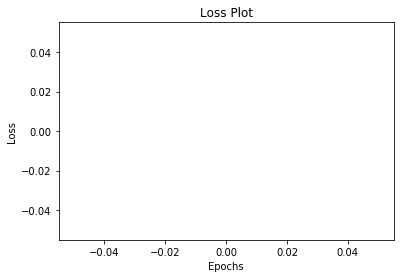

In [28]:
plt.plot(attentionModel.loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [29]:
attentionModel.load_checkpoint()

## 9. Validation Visualise

Real Caption: <start> a woman taking a selfie in front of a bathroom mirror <end>
Prediction Caption: <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


D:\IDEs\anaconda\envs\ImageCaptioningWithAttention\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
D:\IDEs\anaconda\envs\ImageCaptioningWithAttention\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
D:\IDEs\anaconda\envs\ImageCaptioningWithAttention\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
D:\IDEs\anaconda\envs\ImageCaptioningWithAttention\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
D:\IDEs\anaconda\envs\ImageCaptioningWithAttention\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newma

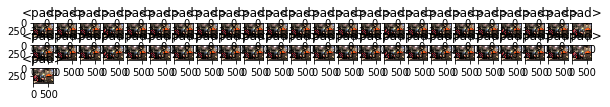

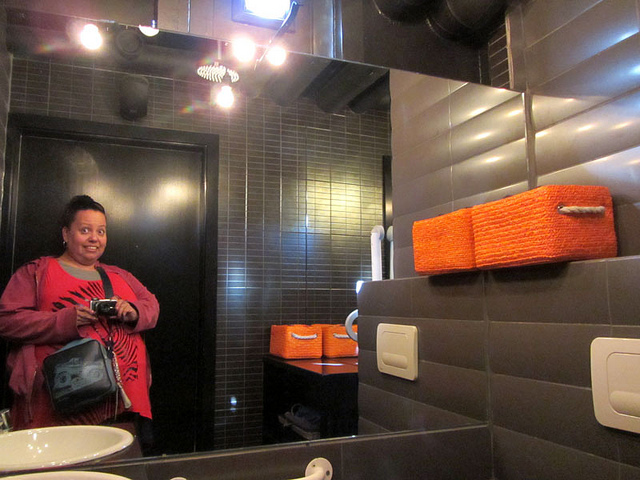

In [30]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
rid = 0
image = img_name_val[rid]
real_caption = ' '.join([tokenisations.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = attentionModel.evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))
vis.plot_attention(image, result, attention_plot)
# opening the image
Image.open(img_name_val[rid])

## 10. Predictions

In [ ]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension, 
                                     origin=image_url)

result, attention_plot = attentionModel.evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
vis.plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)